In [1]:
!pip install azureml-core --upgrade


In [2]:
import pandas as pd
from azureml.core import Workspace, Dataset

# Connect to my Azure ML workspace
ws = Workspace.from_config()

# Loading my dataset by name
dataset = Dataset.get_by_name(ws, name='SleepStudyData_Project')

# Convert to a pandas DataFrame
df = dataset.to_pandas_dataframe()

# Show first 5 rows
df.head()

{'infer_column_types': 'False', 'activity': 'to_pandas_dataframe'}
{'infer_column_types': 'False', 'activity': 'to_pandas_dataframe', 'activityApp': 'TabularDataset'}


,StudyID,TechName,PatientName,PatientAge,StartTime,EndTime,DisorderType,MachineUsed,Passed
0,1,Brison,Danielle,37,2024-07-22 22:00,2024-07-23 05:00,REM Disorder,F&P Icon,False
1,2,Jordan,Angel,45,2024-07-24 22:00,2024-07-25 04:00,RestlessLegs,ResMed S10,False
2,3,Emily,Joshua,34,2024-07-08 20:00,2024-07-09 05:00,Insomnia,ResMed S10,True
3,4,Darius,Jeffrey,65,2024-07-18 21:00,2024-07-19 02:00,Insomnia,DreamStation,False
4,5,Lisa,Jill,64,2024-07-19 22:00,2024-07-20 02:00,Insomnia,ResMed S10,True


In [3]:
# Convert StartTime and EndTime to datetime format
df['StartTime'] = pd.to_datetime(df['StartTime'])
df['EndTime'] = pd.to_datetime(df['EndTime'])

# Check that it worked
df.dtypes

StudyID                  int64
TechName                object
PatientName             object
PatientAge               int64
StartTime       datetime64[ns]
EndTime         datetime64[ns]
DisorderType            object
MachineUsed             object
Passed                    bool
dtype: object

In [4]:
df['DurationHours'] = (df['EndTime'] - df['StartTime']).dt.total_seconds() / 3600

In [5]:
#checks if there are any null values in the data
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of     StudyID  TechName  PatientName  PatientAge  StartTime  EndTime  \
0     False     False        False       False      False    False   
1     False     False        False       False      False    False   
2     False     False        False       False      False    False   
3     False     False        False       False      False    False   
4     False     False        False       False      False    False   
..      ...       ...          ...         ...        ...      ...   
95    False     False        False       False      False    False   
96    False     False        False       False      False    False   
97    False     False        False       False      False    False   
98    False     False        False       False      False    False   
99    False     False        False       False      False    False   

    DisorderType  MachineUsed  Passed  DurationHours  
0          False        False   False     

In [6]:
# This is showing rows where DurationHours is 0 or less
df[df['DurationHours'] <= 0]

,StudyID,TechName,PatientName,PatientAge,StartTime,EndTime,DisorderType,MachineUsed,Passed,DurationHours


In [7]:
# Here we are making sure the data is clean by going through the categorial data seeing if the casing is consistent
print("Disorder Types:", df['DisorderType'].unique())
print("Machine Used:,", df['MachineUsed'].unique())
print("Tech Names:", df['TechName'].unique())

Disorder Types: ['REM Disorder' 'RestlessLegs' 'Insomnia' 'Apnea' 'Narcolepsy']
Machine Used:, ['F&P Icon' 'ResMed S10' 'DreamStation' 'Philips A40' 'ResMed S9']
Tech Names: ['Brison' 'Jordan' 'Emily' 'Darius' 'Lisa']


In [8]:
# Here we are stripping the whitespace and converting the name to Title Case
df['MachineUsed'] =  df['MachineUsed'].str.strip().str.title()
df['TechName'] = df['TechName'].str.strip().str.title()

# We are also going to verify that the cleanup worked

print("Cleaned Machine Used:", df['MachineUsed'].unique)
print("Cleaned Tech Names:", df['TechName'].unique)

Cleaned Machine Used: <bound method Series.unique of 0         F&P Icon
1       Resmed S10
2       Resmed S10
3     Dreamstation
4       Resmed S10
          ...     
95       Resmed S9
96       Resmed S9
97    Dreamstation
98        F&P Icon
99       Resmed S9
Name: MachineUsed, Length: 100, dtype: object>
Cleaned Tech Names: <bound method Series.unique of 0     Brison
1     Jordan
2      Emily
3     Darius
4       Lisa
       ...  
95    Brison
96    Jordan
97     Emily
98    Darius
99      Lisa
Name: TechName, Length: 100, dtype: object>


In [9]:
# Stripping the whitespace and converting to title case
df['DisorderType'] = df['DisorderType'].str.strip().str.title()

# Add a space between Restlesslegs
df['DisorderType'] = df['DisorderType'].replace({'Restlesslegs': 'Restless Legs'})

# Verifying that the cleanup worked
print(df['DisorderType'].unique())

['Rem Disorder' 'Restless Legs' 'Insomnia' 'Apnea' 'Narcolepsy']


In [10]:
# This will show any duplicate rows if there are any
df[df.duplicated()]

,StudyID,TechName,PatientName,PatientAge,StartTime,EndTime,DisorderType,MachineUsed,Passed,DurationHours


In [11]:
# Here we will reorder the columns
df = df[['StudyID', 'TechName', 'PatientName', 'PatientAge','StartTime','EndTime', 'DurationHours','DisorderType','MachineUsed','Passed']]
df.head()

,StudyID,TechName,PatientName,PatientAge,StartTime,EndTime,DurationHours,DisorderType,MachineUsed,Passed
0,1,Brison,Danielle,37,2024-07-22 22:00:00,2024-07-23 05:00:00,7.0,Rem Disorder,F&P Icon,False
1,2,Jordan,Angel,45,2024-07-24 22:00:00,2024-07-25 04:00:00,6.0,Restless Legs,Resmed S10,False
2,3,Emily,Joshua,34,2024-07-08 20:00:00,2024-07-09 05:00:00,9.0,Insomnia,Resmed S10,True
3,4,Darius,Jeffrey,65,2024-07-18 21:00:00,2024-07-19 02:00:00,5.0,Insomnia,Dreamstation,False
4,5,Lisa,Jill,64,2024-07-19 22:00:00,2024-07-20 02:00:00,4.0,Insomnia,Resmed S10,True


In [12]:
# Here we are saving the cleaned DataFrame to a CSV file
df.to_csv('Cleaned_SleepStudyDaata.csv',index=False)

## Phase 2: Exploratory Data Analysis (EDA)

In [13]:
# Here I will group the dataset by DisorderType, Calculate the average duration in hours for each type, and sort the results in ascending order
avg_durations = df.groupby('DisorderType')['DurationHours'].mean().sort_values(ascending=False)
print(avg_durations)

DisorderType
Apnea            6.952381
Restless Legs    6.681818
Narcolepsy       6.636364
Insomnia         6.450000
Rem Disorder     6.000000
Name: DurationHours, dtype: float64


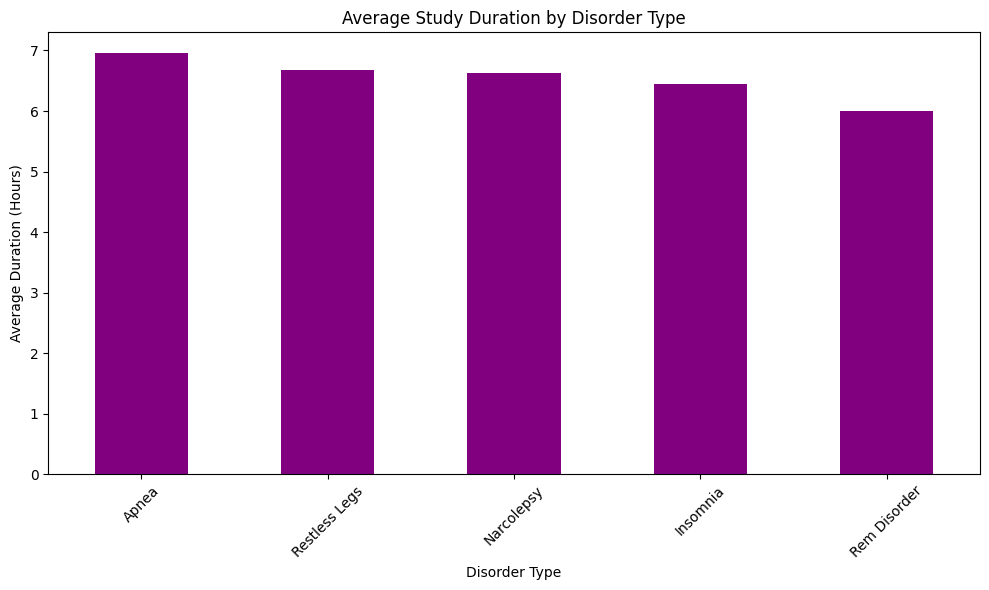

In [14]:
import matplotlib.pyplot as plt

#Set the figure size
plt.figure(figsize=(10,6))

#Creating a bar chart
avg_durations.plot(kind='bar', color='purple', legend=False)

#Add labels and title
plt.title('Average Study Duration by Disorder Type')
plt.ylabel('Average Duration (Hours)')
plt.xlabel('Disorder Type')
plt.xticks(rotation=45)
plt.tight_layout()

#Show the chart
plt.show()

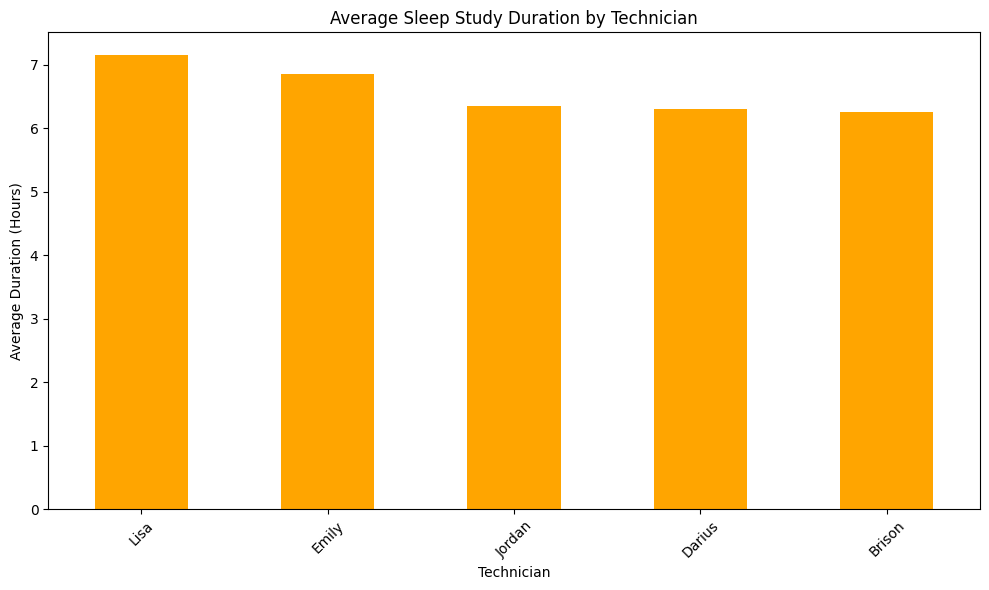

In [31]:
# Here I am grouping by Technician and getting the average DurationHours
avg_duration_by_tech = df.groupby('TechName')['DurationHours'].mean().sort_values(ascending=False)

# Import the matplotlib library for plotting
import matplotlib.pyplot as plt

# Set the figure size for the bar chart
plt.figure(figsize=(10,6))

# Plot a bar chart to visualize the aveerage duration per technician
avg_duration_by_tech.plot(kind='bar', color='orange')

# Add chart title and axis labels
plt.title('Average Sleep Study Duration by Technician')
plt.xlabel('Technician')
plt.ylabel('Average Duration (Hours)')
plt.xticks(rotation=45)
plt.tight_layout() #print label cutoff

# Display the Chart
plt.show()

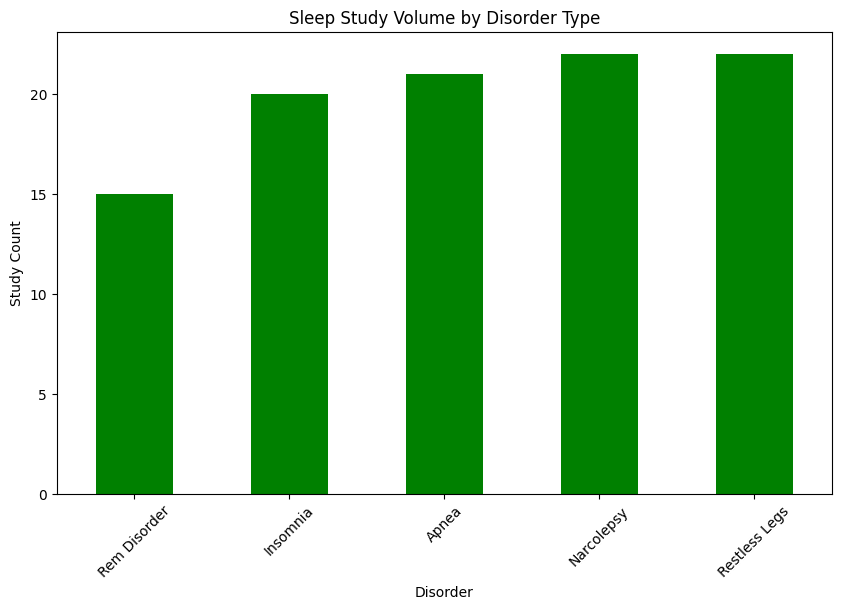

In [32]:
study_volume_by_disorder = df.value_counts('DisorderType').sort_values(ascending=True)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

study_volume_by_disorder.plot(kind='bar', color='green')

plt.title('Sleep Study Volume by Disorder Type')
plt.xlabel('Disorder')
plt.ylabel('Study Count')
plt.xticks(rotation = 45)

plt.show()

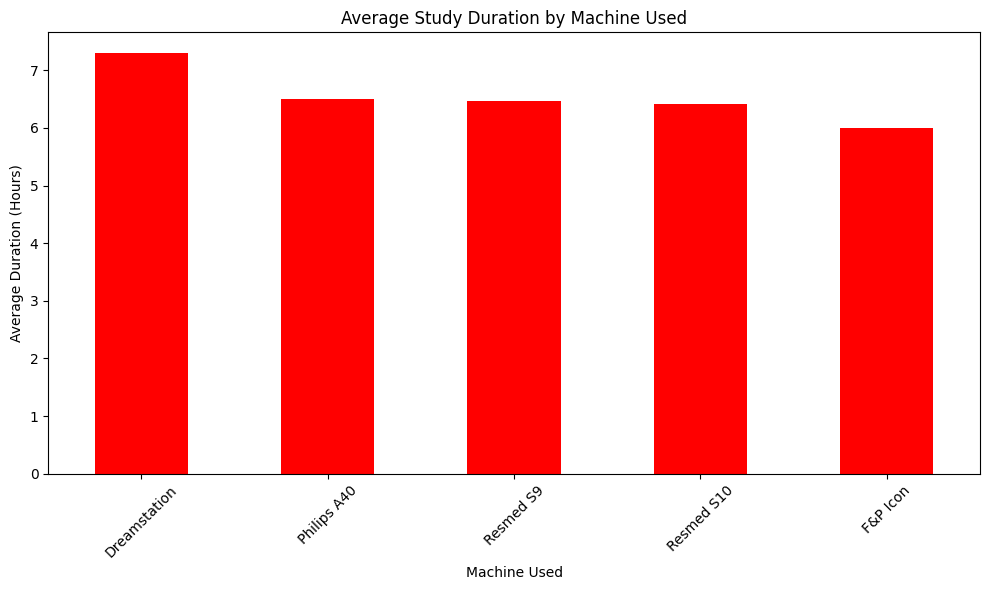

In [33]:
# Grouping by MachineUsed to get the average duration
avg_duration_by_machine = df.groupby('MachineUsed')['DurationHours'].mean().sort_values(ascending=False)

# Plotting the bar chart
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
avg_duration_by_machine.plot(kind='bar', color='red')

plt.title('Average Study Duration by Machine Used')
plt.xlabel('Machine Used')
plt.ylabel('Average Duration (Hours)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

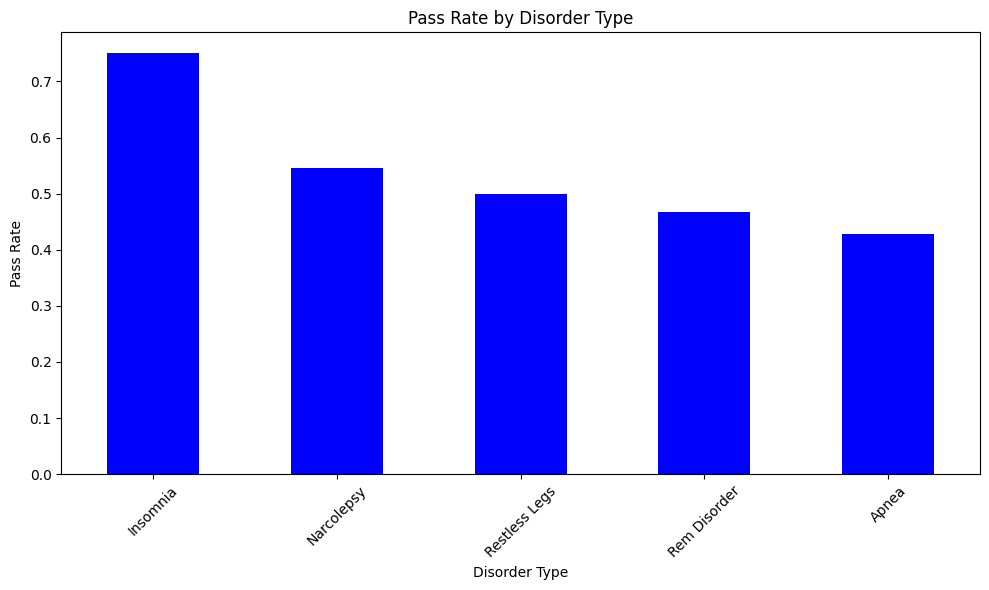

In [34]:
# Group by DisorderType and calculate the pass rate
pass_fail_rate = df.groupby('DisorderType')['Passed'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10,6))
pass_fail_rate.plot(kind='bar', color='blue')

plt.title('Pass Rate by Disorder Type')
plt.xlabel('Disorder Type')
plt.ylabel('Pass Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()